# Challenge Context

<img src="https://challengedata.ens.fr/logo/public/CFM_CoRGB_300dpi_Tight_box.png" width="300" height="300" />
Most financial markets use an electronic trading mechanism called a limit order book to facilitate the trading of assets (stocks, futures, options, etc.). Participants submit (or cancel) orders to this electronic order book. These orders are requests to buy or sell a given quantity of an asset at a specified price, thus allowing buyers to be matched with sellers at a mutually agreed price [1][2]. Since an asset can be traded on multiple trading venues, participants can choose to which venue they send an order. For instance, a US stock can be traded on various exchanges, such as NYSE, NASDAQ, Direct Edge or BATS. When sending an order, participants generally select the best available trading venue at that time [3]. Their decisions may include a statistical analysis of past venue activity.

[1] Trades, Quotes and Prices - Financial Markets Under the Microscope – Jean-Philippe Bouchaud, Julius Bonart, Jonathan Donier, Martin Gould – 2018
[2] https://en.wikipedia.org/wiki/Order_book_(trading)
[3] https://en.wikipedia.org/wiki/Smart_order_routing

## Lecture de données

In [1]:
import numpy as np
import pandas as pd
train_data = pd.read_hdf(r"C:\Users\dell\Desktop\train_dc2020.h5", 'data').drop(columns=["ID"])
labels = pd.read_csv(r"C:\Users\dell\Desktop\train_labels.csv")
test_data= pd.read_hdf(r"C:\Users\dell\Desktop\test_dc2020.h5", 'data')
concat=pd.concat([train_data,labels],axis=1).drop(columns=["ID"]).dropna()


In [2]:
labels

,ID,source_id
0,0,2
1,1,2
2,2,2
3,3,4
4,4,2
...,...,...
959501,959501,4
959502,959502,1
959503,959503,3
959504,959504,4


In [3]:
concat.head()

,"(0, ask)","(0, ask1)","(0, ask_size)","(0, ask_size1)","(0, bid)","(0, bid1)","(0, bid_size)","(0, bid_size1)","(0, price)","(0, qty)",...,"(8, qty)","(8, source_id)","(8, tod)","(9, price)","(9, qty)","(9, source_id)","(9, tod)",stock_id,day_id,source_id
0,1.5,2.5,0.003510,0.003510,-0.5,-1.5,0.010530,0.007020,0.5,0.003510,...,0.003510,4.0,5.338431e+10,-0.5,0.003510,4.0,5.338431e+10,444.0,183.0,2
1,1.5,5.5,0.038110,0.038110,-5.5,-9.5,0.038110,0.038110,0.5,0.022104,...,0.053735,5.0,5.577584e+10,0.5,0.057546,5.0,5.577584e+10,95.0,226.0,2
3,3.0,6.0,0.073099,0.036550,-2.0,-6.0,0.036550,0.036550,0.0,0.014620,...,0.000365,1.0,3.508851e+10,-4.0,0.033991,1.0,3.508851e+10,305.0,248.0,4
4,8.5,212.5,0.028645,0.028645,-12.5,-208.5,0.028645,0.028645,-1.5,0.028645,...,0.021770,4.0,4.195373e+10,-1.5,0.028645,2.0,4.195373e+10,70.0,177.0,2
5,1.0,3.0,0.031847,0.031847,-3.0,-6.0,0.031847,0.031847,-1.0,0.031847,...,0.031847,1.0,3.743043e+10,-1.0,0.001592,3.0,3.743033e+10,279.0,127.0,5


# Exploratory Data Analysis

In [3]:
def askvsbid(index,df):
    df=df.iloc[index]
    emptydict={"name":[],"value":[],"venue":[],"type":[]}
    for key,data in df.to_dict().items():
        emptydict["name"].append(key[1])
        emptydict["value"].append(data)
        emptydict["venue"].append(key[0])
        datatype="book"
        if key[1]=="price" or key[1]=="qty" or key[1]=="source_id" or key[1]=="tod":
            datatype="trade"
        emptydict["type"].append(datatype)
    finaldf=pd.DataFrame(emptydict)[:94]
    allowedcolumns=["ask","bid",]
    onlyAskAndBid=finaldf[finaldf.name.isin(allowedcolumns)]
    return onlyAskAndBid

In [4]:
onlyAskAndBid=askvsbid(0,concat)
onlyAskAndBid["name"]=onlyAskAndBid["name"]+"_"+onlyAskAndBid["venue"].apply(str)
onlyAskAndBid["value"]=onlyAskAndBid["value"]+50

In [9]:
import plotly.express as px

fig = px.bar(onlyAskAndBid, x='name', y='value',color="venue", labels={"venue":"Plateforme boursiere"})
fig.show()

In [10]:
def getTrades(index,df):
    point=df.iloc[index]
    emptydict={"price":[],"qty":[],"venue":[],"tod":[]}
    for key,data in point.to_dict().items():
        if key[1]=="price":
            emptydict["price"].append(data)
        if key[1]=="qty":
            emptydict["qty"].append(data)
        if key[1]=="source_id":
            emptydict["venue"].append(data)
        if key[1]=="tod":
            emptydict["tod"].append(data)
    
    onlyTrades=pd.DataFrame(emptydict).sort_values(by="tod")
    onlyTrades.tod=onlyTrades.tod
    onlyTrades.tod=onlyTrades.tod.astype(str)
    onlyTrades.price=onlyTrades.price+10
    onlyTrades.venue=onlyTrades.venue.astype(str)
    return onlyTrades

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'TimeStamp in milliseconds')]

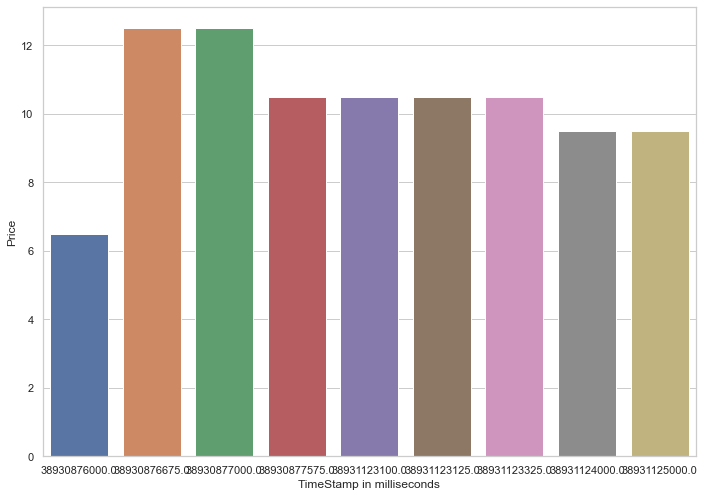

In [13]:
onlyTrades=getTrades(0,concat)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax=sns.barplot(data=onlyTrades,x='tod',y='price')
ax.set(xlabel='TimeStamp in milliseconds', ylabel='Price')


# Target Variable Balance?

<AxesSubplot:xlabel='source_id', ylabel='Count'>

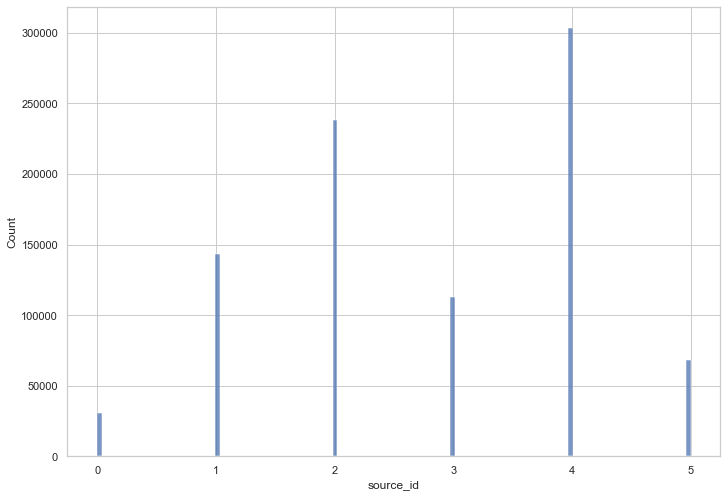

In [16]:
sns.histplot(data=concat["source_id"])

# Trends by stock


## Existe t-il des stocks sur ou sous représentés?

<AxesSubplot:xlabel='stock_id', ylabel='Count'>

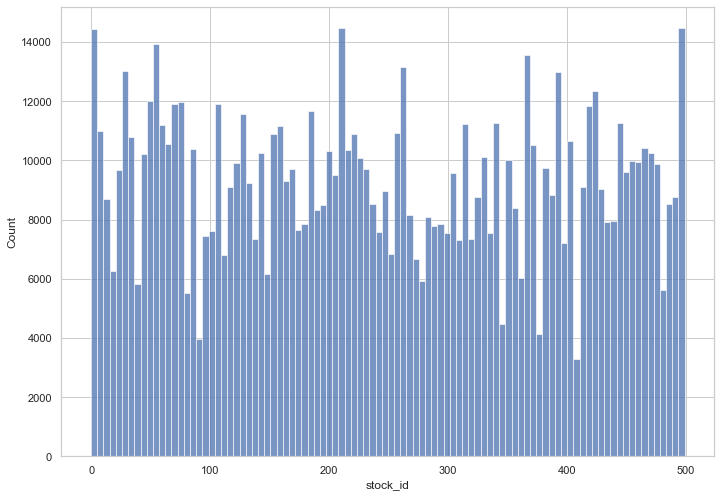

In [11]:
sns.histplot(data=concat["stock_id"])

## Existe t-il des stocks ayant une venue dominante?

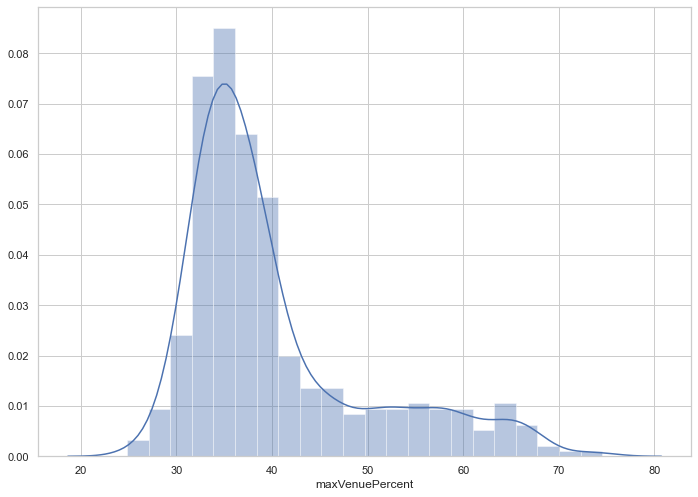

In [20]:
import seaborn as sns
groupby=concat.groupby(["stock_id","source_id"]).count()[(0,"ask")]
emptydict={"stock_id":[],"maxVenue":[],"maxVenueCount":[],"maxVenuePercent":[]}
for i in groupby.index.get_level_values('stock_id').unique():
    groupbyStockAndVenue=groupby[i]
    maxVenueCount=groupbyStockAndVenue.max()
    maxVenue=groupbyStockAndVenue.idxmax()
    sumCount=groupbyStockAndVenue.sum()
    emptydict["stock_id"].append(i)
    emptydict["maxVenue"].append(maxVenue)
    emptydict["maxVenueCount"].append(maxVenueCount)
    emptydict["maxVenuePercent"].append((maxVenueCount/sumCount)*100)
GroupedByStock=pd.DataFrame(emptydict)


sns.distplot(GroupedByStock["maxVenuePercent"])



In [21]:
#Quelle venue est favorite?
GroupedByStock.maxVenue.unique()


#Il en existe que la 4

array([4, 2, 3], dtype=int64)

## Existe t-il des jours ayant une venue dominante?

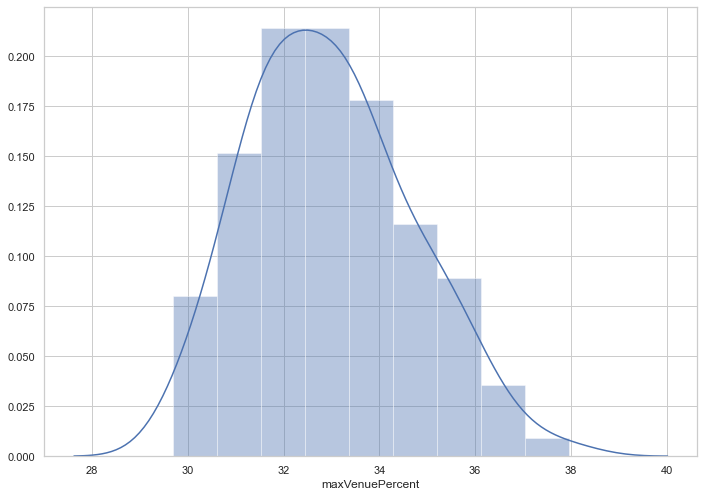

In [22]:
groupby=concat.groupby(["day_id","source_id"]).count()[(0,"ask")]
emptydict={"day_id":[],"maxVenue":[],"maxVenueCount":[],"maxVenuePercent":[]}
for i in groupby.index.get_level_values('day_id').unique():
    groupbyStockAndVenue=groupby[i]
    maxVenueCount=groupbyStockAndVenue.max()
    maxVenue=groupbyStockAndVenue.idxmax()
    sumCount=groupbyStockAndVenue.sum()
    emptydict["day_id"].append(i)
    emptydict["maxVenue"].append(maxVenue)
    emptydict["maxVenueCount"].append(maxVenueCount)
    emptydict["maxVenuePercent"].append((maxVenueCount/sumCount)*100)
GroupedByDay=pd.DataFrame(emptydict)


sns.distplot(GroupedByDay["maxVenuePercent"])
    


In [23]:
#Quelle venue est favorite?
GroupedByDay.maxVenue.unique()


#Il en existe que la 4

array([4, 2], dtype=int64)

# Feature engineering

In [37]:
def featEngineering(df):
    #venue with best ask => venue with lowest ask
    askColumns=[(0,"ask"),(1,"ask"),(2,"ask"),(3,"ask"),(4,"ask"),(5,"ask")]
    df["best_ask_venue"]=df[askColumns].idxmin(axis=1).apply(lambda s: s[0])

    #venue with best bid=> venue with highest bid
    bidColumns=[(0,"bid"),(1,"bid"),(2,"bid"),(3,"bid"),(4,"bid"),(5,"bid")]
    df["best_bid_venue"]=df[bidColumns].idxmax(axis=1).apply(lambda s: s[0])
    #venue with largest asksize
    askSizeColumns=[(0,"ask_size"),(1,"ask_size"),(2,"ask_size"),(3,"ask_size"),(4,"ask_size"),(5,"ask_size")]
    df["best_ask_size_venue"]=df[askSizeColumns].idxmax(axis=1).apply(lambda s: s[0])

    #venue with largets bidsize
    bidSizeColumns=[(0,"bid_size"),(1,"bid_size"),(2,"bid_size"),(3,"bid_size"),(4,"bid_size"),(5,"bid_size")]
    df["best_bid_size_venue"]=df[bidSizeColumns].idxmax(axis=1).apply(lambda s: s[0])

    #Convert timestamp to hour
    def millisecondsToHours(millis):
        return int((millis/(1000000*60*60)))

    df["hour"]=df[(0,"tod")].apply(lambda x:millisecondsToHours(x))
    return df

train_data=featEngineering(train_data)
test_data=featEngineering(test_data)


In [41]:
from sklearn.model_selection import train_test_split
concat=pd.concat([train_data,labels],axis=1).drop(columns=["ID"]).dropna()
y=concat["source_id"]
X=concat.drop(columns=["source_id"])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X, y)
# y_pred = clf.predict(X_test)

RandomForestClassifier(n_estimators=10)

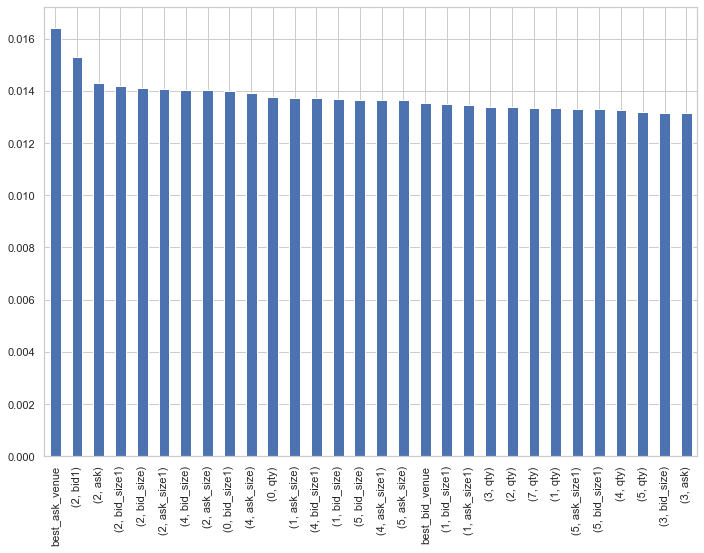

In [52]:
feat_importances = pd.Series(clf.feature_importances_, index=concat.columns[:101])
feat_importances.nlargest(30).plot(kind='bar')

# Modelling

Logistic Regression :

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(np.nan_to_num(train_data), labels.source_id, random_state=0)

log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)
log_reg.score(X_val, y_val)

0.3383233907377531

In [56]:
from sklearn.model_selection import cross_val_score

logscores = cross_val_score(log_reg, X_val, y_val, cv=10)
print('Cross-Validation Accuracy Scores', logscores)
print('Max Cross-Validation Accuracy Scores', max(logscores))

Cross-Validation Accuracy Scores [0.33804402 0.33721027 0.33775221 0.33862765 0.33904452 0.33883608
 0.33833583 0.33776629 0.33864176 0.33755784]
Max Cross-Validation Accuracy Scores 0.3390445222611306


Random Forest Classifier :

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions= rf.predict(X_val)

print(classification_report(y_val,predictions))
print(accuracy_score(y_val, predictions))

              precision    recall  f1-score   support

           0       0.19      0.05      0.08      8235
           1       0.28      0.26      0.27     38370
           2       0.42      0.55      0.48     63690
           3       0.43      0.31      0.36     30052
           4       0.51      0.59      0.55     81172
           5       0.34      0.09      0.14     18358

    accuracy                           0.43    239877
   macro avg       0.36      0.31      0.31    239877
weighted avg       0.42      0.43      0.41    239877

0.43472279543265924


Xgboost :

In [61]:
import xgboost as xgb

param_dist = {'objective':'multi:softmax', 'n_estimators':10}

clf = xgb.XGBClassifier(**param_dist)
clf.fit(X_train, y_train,verbose=True)

[18:32:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions= clf.predict(X_val)

print(classification_report(y_val,predictions))
print(accuracy_score(y_val, predictions))

              precision    recall  f1-score   support

           0       0.40      0.08      0.13      8235
           1       0.43      0.17      0.25     38370
           2       0.45      0.65      0.53     63690
           3       0.52      0.36      0.43     30052
           4       0.53      0.68      0.60     81172
           5       0.46      0.14      0.22     18358

    accuracy                           0.49    239877
   macro avg       0.46      0.35      0.36    239877
weighted avg       0.48      0.49      0.46    239877

0.48950086919546265


Light GBM

In [108]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['objective'] = 'multiclass'
params['num_class'] = 6
clf = lgb.train(params, d_train, 100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.519171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21355
[LightGBM] [Info] Number of data points in the train set: 719629, number of used features: 101
[LightGBM] [Info] Start training from score -3.373918
[LightGBM] [Info] Start training from score -1.835213
[LightGBM] [Info] Start training from score -1.324234
[LightGBM] [Info] Start training from score -2.071134
[LightGBM] [Info] Start training from score -1.084547
[LightGBM] [Info] Start training from score -2.576214


In [ ]:
predictions= clf.predict(X_val)
A=[]
for i in range(len(predictions)):
    maximum = np.max(predictions[i])
    index_of_maximum = np.where(predictions[i] == maximum)[0][0]
    A.append(index_of_maximum)

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_val,pd.Series(A)))
print(accuracy_score(y_val, pd.Series(A)))

              precision    recall  f1-score   support

           0       0.51      0.03      0.06      8235
           1       0.49      0.10      0.17     38370
           2       0.45      0.64      0.53     63690
           3       0.57      0.28      0.38     30052
           4       0.49      0.74      0.59     81172
           5       0.49      0.08      0.14     18358

    accuracy                           0.48    239877
   macro avg       0.50      0.31      0.31    239877
weighted avg       0.49      0.48      0.43    239877

0.47959579284383247


CatBoost

In [ ]:
pd.set_option('display.max_columns', None)
cat_features=[train_data.columns.get_loc((0, 'source_id')),train_data.columns.get_loc((1, 'source_id')),train_data.columns.get_loc((2, 'source_id')),train_data.columns.get_loc((3, 'source_id')),train_data.columns.get_loc((4, 'source_id')),train_data.columns.get_loc((5, 'source_id')),train_data.columns.get_loc((6, 'source_id')),train_data.columns.get_loc((7, 'source_id')),train_data.columns.get_loc((8, 'source_id')),train_data.columns.get_loc((9, 'source_id')),train_data.columns.get_loc("hour")]

In [68]:
from catboost import Pool, CatBoostClassifier

# train_data = [["summer", 1924, 44],
#               ["summer", 1932, 37],
#               ["winter", 1980, 37],
#               ["summer", 2012, 204]]

# eval_data = [["winter", 1996, 197],
#              ["winter", 1968, 37],
#              ["summer", 2002, 77],
#              ["summer", 1948, 59]]



train_dataset = Pool(data=train_data,
                     label=labels.drop(columns=["ID"]),
                     cat_features=cat_features)

# eval_dataset = Pool(data=eval_data,
#                     label=eval_label,
#                     cat_features=cat_features)

# # Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=200,
                           learning_rate=0.8,
                           loss_function='MultiClass')
# # Fit model
model.fit(train_dataset)
# # Get predicted classes
# preds_class = model.predict(eval_dataset)
# # Get predicted probabilities for each class
# preds_proba = model.predict_proba(eval_dataset)
# # Get predicted RawFormulaVal
# preds_raw = model.predict(eval_dataset, 
#                           prediction_type='RawFormulaVal')

0:	learn: 1.4803175	total: 16s	remaining: 53m 12s
1:	learn: 1.4269979	total: 29.6s	remaining: 48m 52s
2:	learn: 1.4032018	total: 42.6s	remaining: 46m 36s
3:	learn: 1.3888409	total: 56.8s	remaining: 46m 24s
4:	learn: 1.3718091	total: 1m 9s	remaining: 44m 59s
5:	learn: 1.3603416	total: 1m 22s	remaining: 44m 28s
6:	learn: 1.3556786	total: 1m 37s	remaining: 44m 54s
7:	learn: 1.3490357	total: 1m 54s	remaining: 45m 58s
8:	learn: 1.3447035	total: 2m 12s	remaining: 46m 44s
9:	learn: 1.3377410	total: 2m 25s	remaining: 46m 2s
10:	learn: 1.3354533	total: 2m 38s	remaining: 45m 27s
11:	learn: 1.3334396	total: 2m 48s	remaining: 44m 7s
12:	learn: 1.3299280	total: 3m 2s	remaining: 43m 43s
13:	learn: 1.3270715	total: 3m 17s	remaining: 43m 42s
14:	learn: 1.3240304	total: 3m 29s	remaining: 43m 3s
15:	learn: 1.3222316	total: 3m 41s	remaining: 42m 30s
16:	learn: 1.3198175	total: 3m 54s	remaining: 42m 7s
17:	learn: 1.3168373	total: 4m 9s	remaining: 41m 59s
18:	learn: 1.3149687	total: 4m 22s	remaining: 41m 3

151:	learn: 1.2568884	total: 35m 45s	remaining: 11m 17s
152:	learn: 1.2567801	total: 35m 59s	remaining: 11m 3s
153:	learn: 1.2566114	total: 36m 11s	remaining: 10m 48s
154:	learn: 1.2564504	total: 36m 27s	remaining: 10m 35s
155:	learn: 1.2563068	total: 36m 39s	remaining: 10m 20s
156:	learn: 1.2560707	total: 36m 52s	remaining: 10m 5s
157:	learn: 1.2559291	total: 37m 7s	remaining: 9m 52s
158:	learn: 1.2557907	total: 37m 21s	remaining: 9m 38s
159:	learn: 1.2556191	total: 37m 34s	remaining: 9m 23s
160:	learn: 1.2553187	total: 37m 51s	remaining: 9m 10s
161:	learn: 1.2551017	total: 38m 3s	remaining: 8m 55s
162:	learn: 1.2549423	total: 38m 17s	remaining: 8m 41s
163:	learn: 1.2546278	total: 38m 31s	remaining: 8m 27s
164:	learn: 1.2545246	total: 38m 46s	remaining: 8m 13s
165:	learn: 1.2544077	total: 39m 3s	remaining: 8m
166:	learn: 1.2543249	total: 39m 16s	remaining: 7m 45s
167:	learn: 1.2541245	total: 39m 33s	remaining: 7m 32s
168:	learn: 1.2540285	total: 39m 52s	remaining: 7m 18s
169:	learn: 1

In [70]:
model.eval_metrics(train_dataset,["Accuracy"])

{'Accuracy': [0.4356595998357488,
  0.4458273319812487,
  0.4556646857862275,
  0.4612748643572839,
  0.46763334465860557,
  0.4701940373483855,
  0.4729006384535375,
  0.47451813745823374,
  0.47613459425996296,
  0.4787651145485281,
  0.4795644842241737,
  0.4803586428849846,
  0.4821449787703256,
  0.4832716001775914,
  0.4840668010413692,
  0.4849505891573372,
  0.48601259398065255,
  0.4874841845699766,
  0.48795838691993587,
  0.48857745548230025,
  0.4893632765193756,
  0.48985623852273985,
  0.4905013621592778,
  0.4908515423561708,
  0.4912465372806423,
  0.4918312131450976,
  0.49213970522331285,
  0.4925472065833877,
  0.49270249482546224,
  0.4928807115328096,
  0.4934195304667193,
  0.49371968492119905,
  0.4939833622718357,
  0.49438044160224115,
  0.4948129558335227,
  0.4950662111544899,
  0.49535281697039935,
  0.4957582339245403,
  0.49596980112682987,
  0.49613863800747465,
  0.4962449427101029,
  0.4965419705556818,
  0.4968452516190623,
  0.49703805916794686,
  0.4

In [75]:
preds_class = model.predict(test_data.drop(columns=["ID"]))

In [76]:
preds_class=[p[0] for p in preds_class]

In [78]:
sub= pd.DataFrame({'ID': test_data.ID, 'source_id': preds_class})

sub.to_csv('BestCatBoost2.csv',index=False)